# Environment and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
# Standardise values for learning
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method

In [4]:
# Determine the best K using Elbow Method
inertias = []
Ks = range(1, 11)

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

inertias

[2313.999999999999,
 1661.6761165626497,
 1277.928488844643,
 1211.7531134671588,
 1123.1565470796968,
 1079.5385091588264,
 1014.4309086924652,
 982.6549762937694,
 927.9560760726209,
 879.4257007542493]

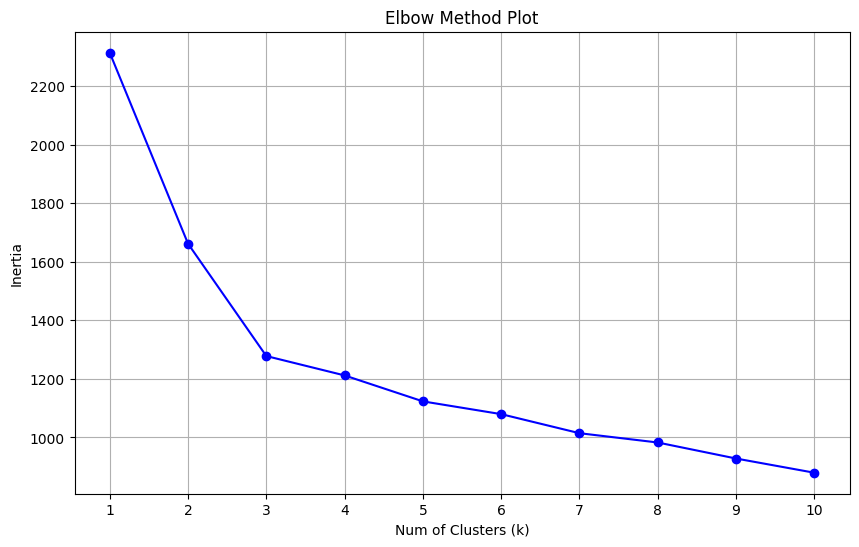

In [5]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(Ks, inertias, 'bo-')
plt.xlabel('Num of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method Plot')
plt.xticks(Ks)
plt.grid(True)
plt.show()

# Clustering

In [6]:
# Learning using the best k=3
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# PCA and Plot

In [7]:
# Reduce dimension to plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = clusters
pca_df['label'] = y

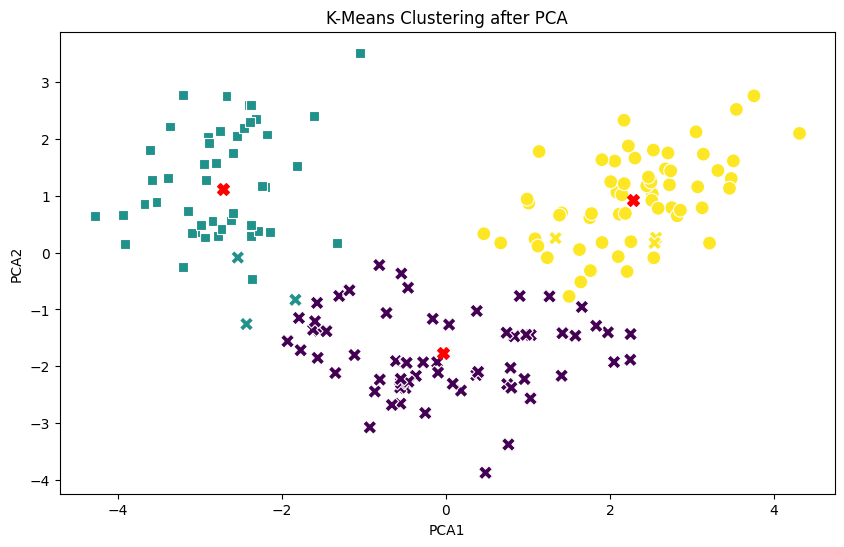

In [8]:
# Plot clusters
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='cluster',
    style='label',
    data=pca_df,
    palette='viridis',
    s=100,
    legend=False
)

# Plot centroid
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=70, marker='X', label='centroid')

plt.title('K-Means Clustering after PCA')
plt.show()